# Marketing analysis

## Import packages

In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [443]:
# Set notebook options
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('paper', font_scale = 1)
sns.set_style('ticks')
sns.set_palette('muted')

# turn off warnings for final notebook
# import warnings
# warnings.filterwarnings('ignore')

# Import data

In [444]:
df = pd.read_csv('./data/marketing_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


# Data cleaning and preparation

In [445]:
# clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '', regex=False)

# transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '', regex=False)
df['Income'] = df['Income'].str.replace(',', '', regex=False).astype('float')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [446]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Only `Income` has limited missing data.  
The subsequent section will plot this column to determine the imputation method for resolving this.

/opt/anaconda3/envs/marketing_analysis/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



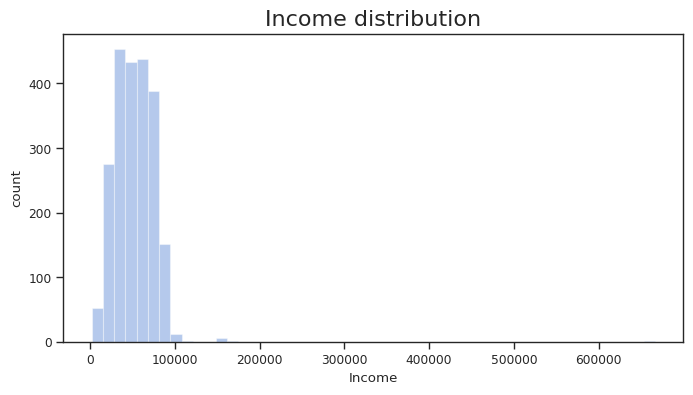

In [447]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

<AxesSubplot:>

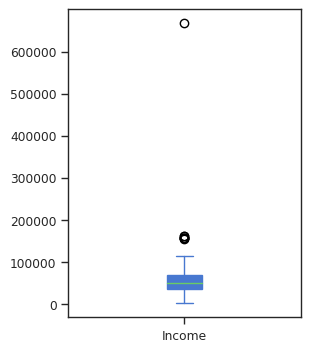

In [448]:
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [449]:
df['Income'] = df['Income'].fillna(df['Income'].median()) # Median is used to limit the effect of outliers.

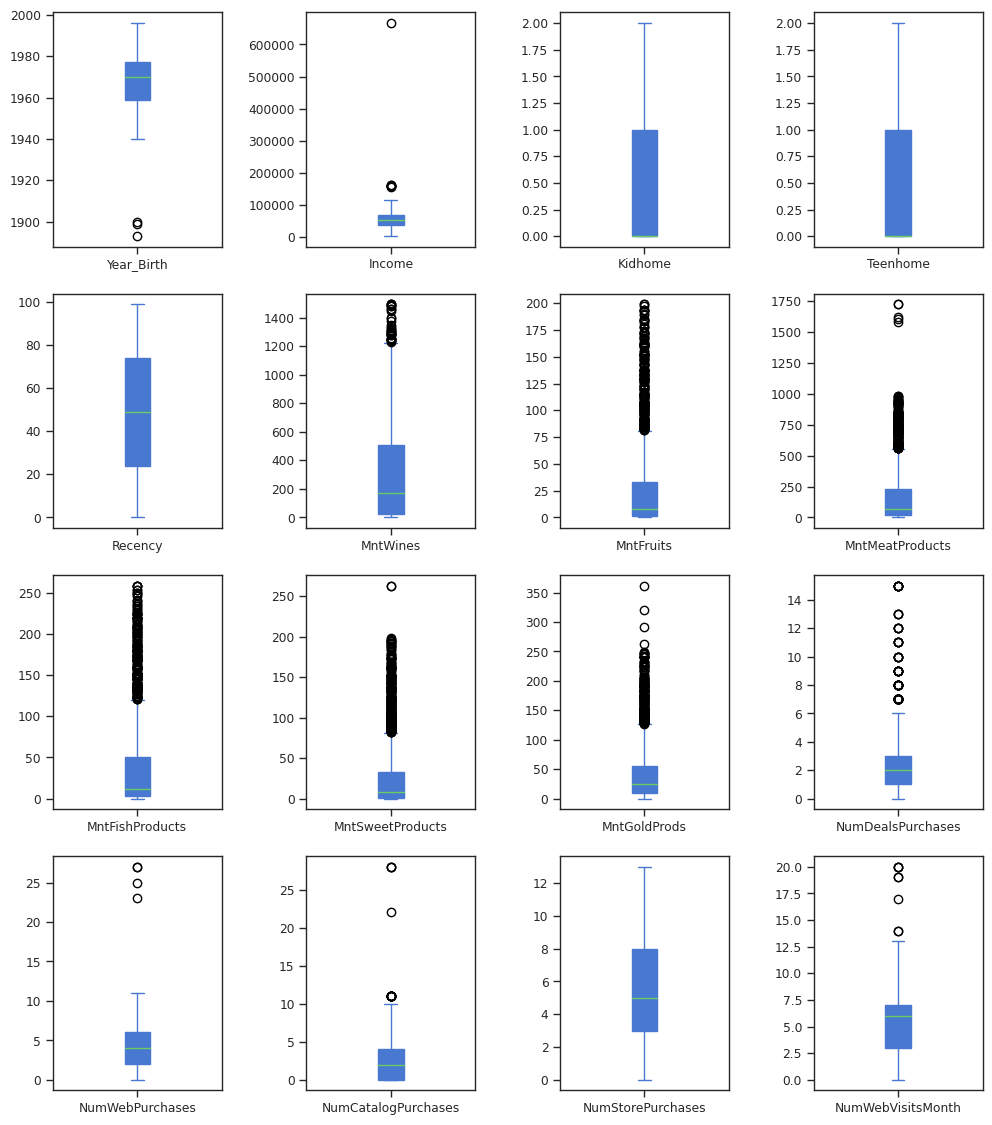

In [450]:
# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Customers who were born before 1900 were removed due them likely being erroneous inputs.

<AxesSubplot:>

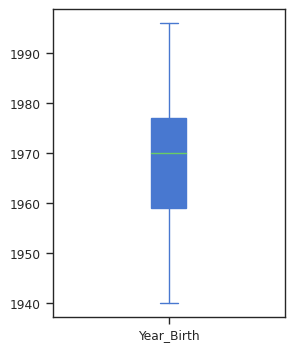

In [451]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', patch_artist=True)

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

The column `Dt_Customer` was converted to a datetime format.

In [453]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [454]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

# Exploratory analysis

In [455]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

# view new features, by customer ID
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


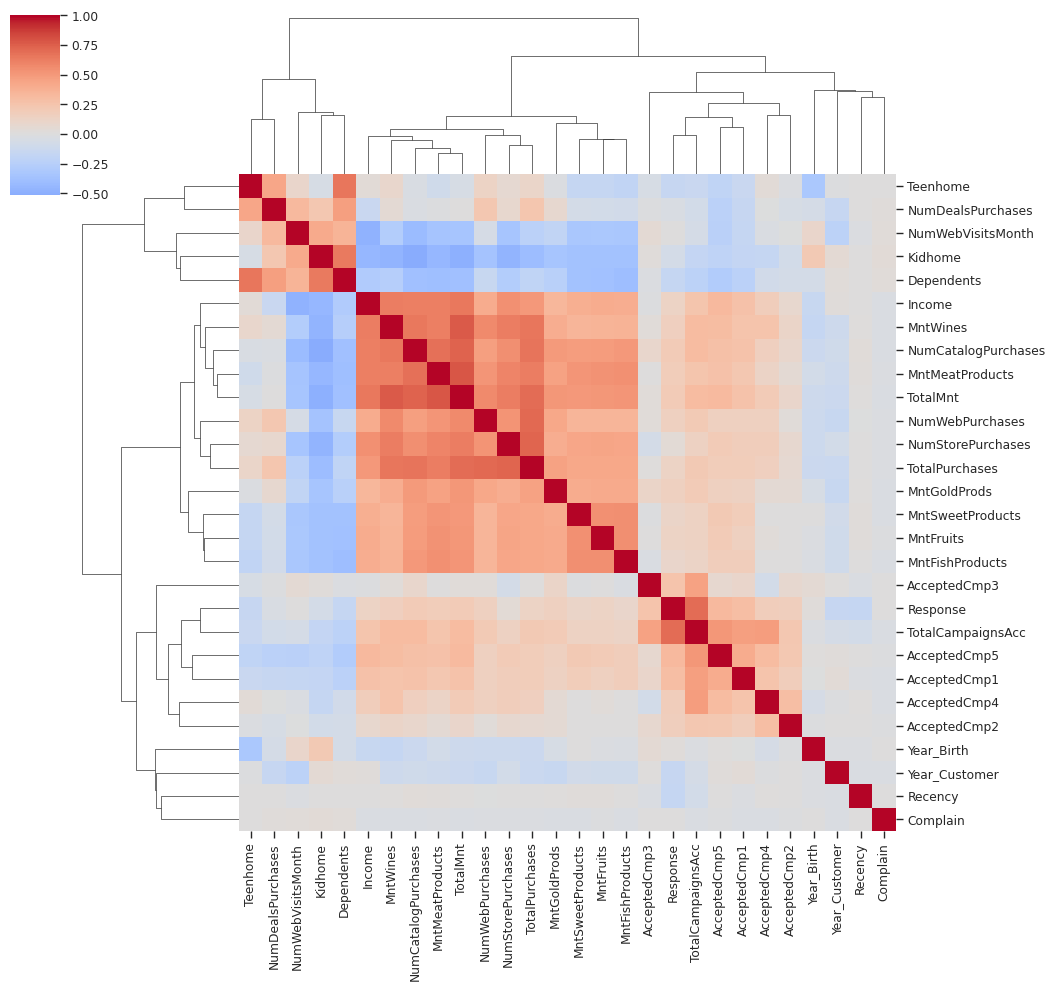

In [456]:
# calculate correlation matrix
# using non-parametric test of correlation (kendall), since some features are binary
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0)

([<matplotlib.axis.YTick at 0x7f6ba29d4700>,
 [Text(0, 0, '0'),
  Text(0, 1000, '1k'),
  Text(0, 2000, '2k'),
  Text(0, 3000, '3k')])

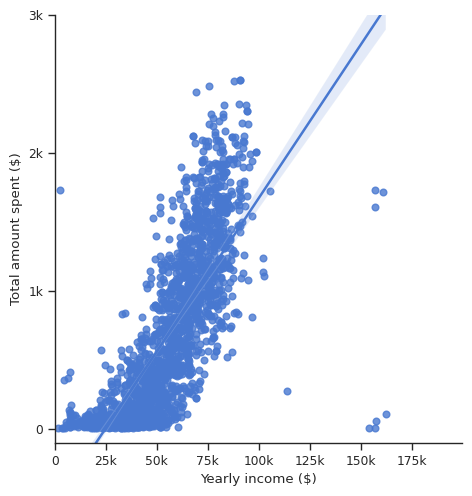

In [457]:
fig = sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income'] < 200000])
fig.set(xlabel = 'Yearly income ($)',
        ylabel = 'Total amount spent ($)',
        xlim = (0,200000),
        ylim = (-100,3000),
        )
plt.xticks(
    [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000],
    ['0', '25k', '50k', '75k', '100k', '125k', '150k', '175k']
    )

plt.yticks(
    [0, 1000, 2000, 3000],
    ['0', '1k', '2k', '3k']
    )

[Text(0.5, 0, 'Dependents'), Text(0, 0.5, 'Total amount spent ($)')]

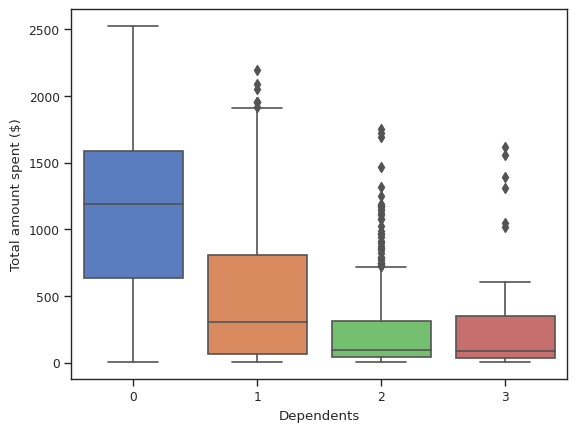

In [485]:
fig = sns.boxplot(x='Dependents', y='TotalMnt', data=df)
fig.set(xlabel = 'Dependents',
        ylabel = 'Total amount spent ($)',
        )

<AxesSubplot:xlabel='Dependents', ylabel='NumDealsPurchases'>

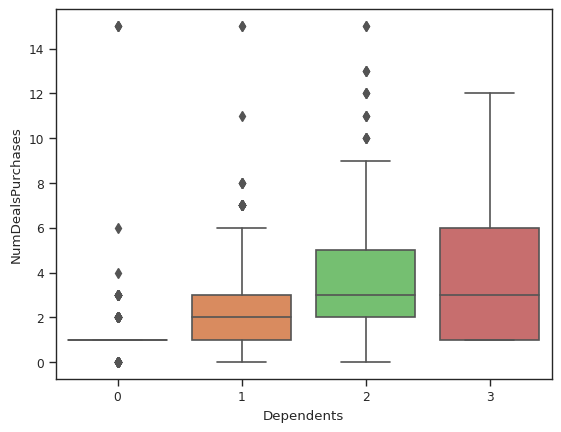

In [486]:
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df)

In [505]:
df['TotalCampaignsAcc']

0       1
1       2
2       0
3       0
4       2
       ..
2232    0
2233    0
2234    0
2235    0
2236    3
Name: TotalCampaignsAcc, Length: 2237, dtype: int64

([<matplotlib.axis.YTick at 0x7f6b99174ac0>,
 [Text(0, 0, '0'),
  Text(0, 25000, '25k'),
  Text(0, 50000, '50k'),
  Text(0, 75000, '75k'),
  Text(0, 100000, '100k'),
  Text(0, 125000, '125k'),
  Text(0, 150000, '150k'),
  Text(0, 175000, '175k')])

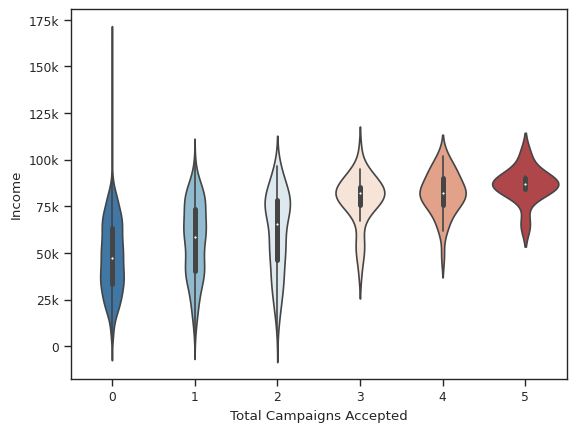

In [544]:
fig = sns.violinplot(x='TotalCampaignsAcc', y='Income', data=df[df['Income']<200000], palette='RdBu_r')
fig.set(ylabel = 'Income',
        xlabel = 'Total Campaigns Accepted',
        )

plt.yticks(
    [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000],
    ['0', '25k', '50k', '75k', '100k', '125k', '150k', '175k']
    )

([<matplotlib.axis.YTick at 0x7f6b99254670>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

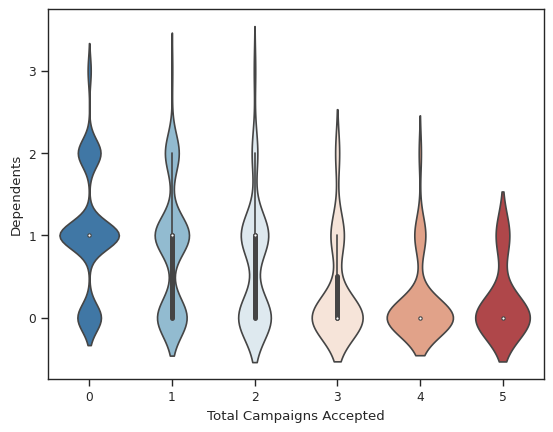

In [543]:
fig = sns.violinplot(x='TotalCampaignsAcc', y='Dependents', data=df, palette='RdBu_r')
fig.set(ylabel = 'Dependents',
        xlabel = 'Total Campaigns Accepted',
        )

plt.yticks(
    [0, 1, 2, 3],
    [0, 1, 2, 3]
    )

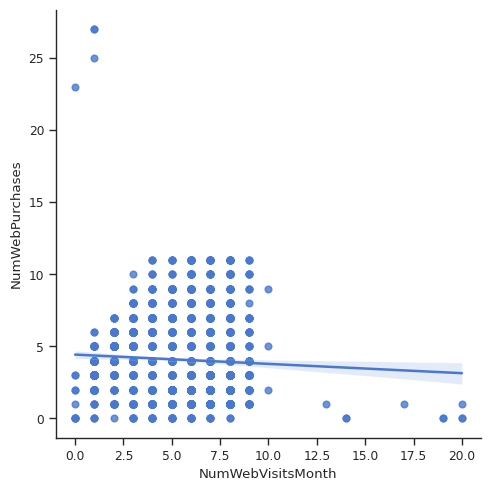

In [462]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df)

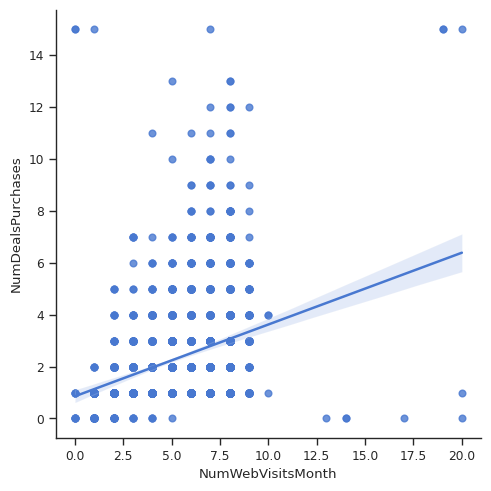

In [463]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df)

# Section 2: Statistical Analysis

/opt/anaconda3/envs/marketing_analysis/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'count')

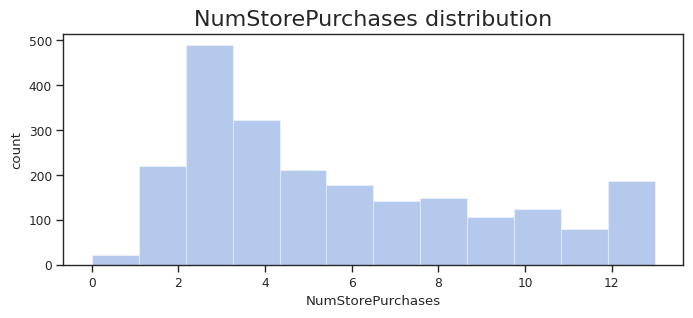

In [464]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count')

In [465]:
# drop unique ID
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [466]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

# get categorical features and review number of unique values
cat = df.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

# merge with numeric data
num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

Number of unique values per categorical feature:
 Education         5
Marital_Status    8
Country           8
dtype: int64


/opt/anaconda3/envs/marketing_analysis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,2014,1190,15,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2014,577,18,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,2014,251,11,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,2014,11,4,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2014,91,8,2


In [467]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  3.405177449612127e-14
Median value of target variable:  5.0


As the RMSE value is small compared to the median value of the target variable, this indicates a good performance of the model.

In [468]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

The most important features that affect the number of store purchases are:
* `TotalPurchases`
* `NumCatalogPurchases`
* `NumWebPurchases`
* `NumDealsPurchases`  
  
All other variables are non-significant.

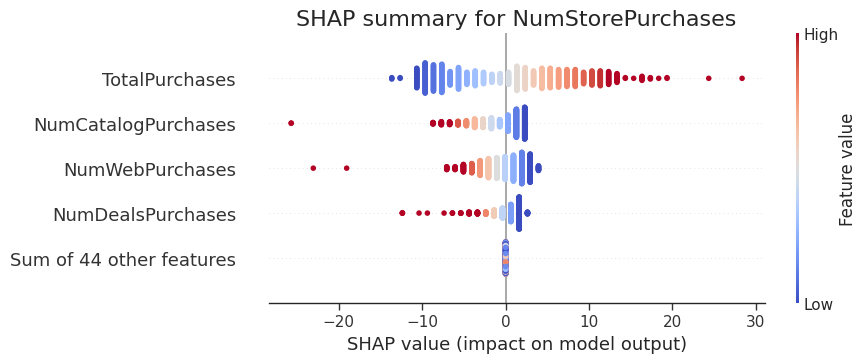

In [480]:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5, color = plt.get_cmap('coolwarm'))

Catalog, web and deals purchases all negatively affect the number of store purchases.  
Only the total amount of purchases positively affects the number of store purchases.  
Therefore, customers who frequently shop in the store, shop less frequently via catalog, web or deals.

Text(0, 0.5, 'Number of Purchases')

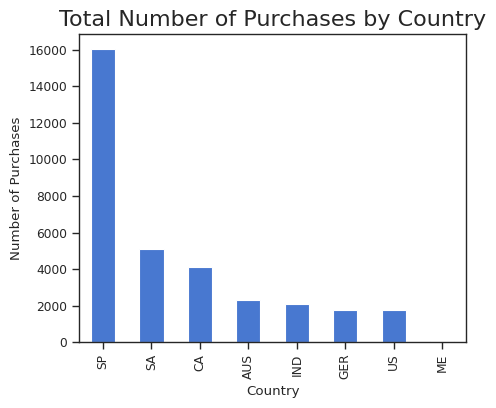

In [429]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases')

Text(0, 0.5, 'Amount Spent')

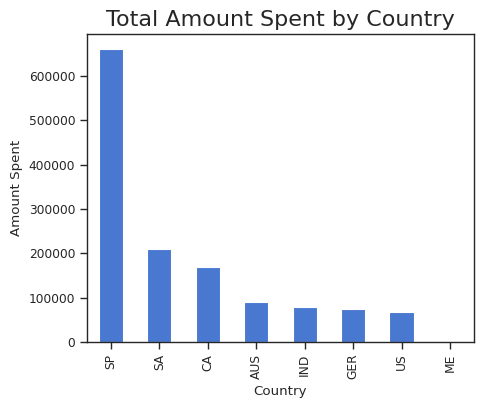

In [430]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent')

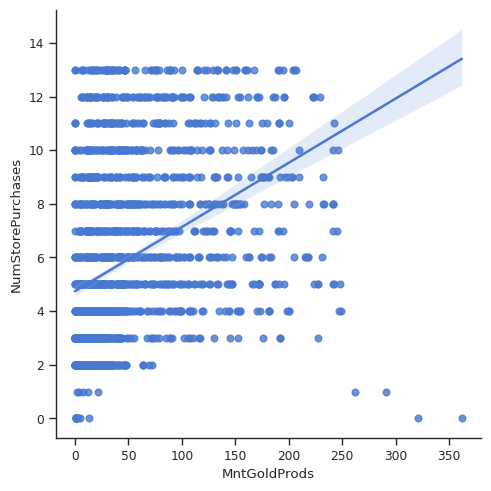

In [431]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = df)

In [432]:
from scipy.stats import kendalltau # Using kendall-tau because it is non-parametric and some features are categorical

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


<AxesSubplot:xlabel='Married_PhD', ylabel='MntFishProducts'>

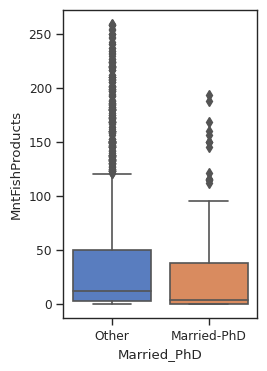

In [433]:
# sum the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

# plot MntFishProducts between Married-PhD and others
plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2)

In [434]:
# independent t-test p-value
from scipy.stats import ttest_ind
pval = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['MntFishProducts'], df2[df2['Married_PhD'] == 'Other']['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval, 3))

t-test p-value:  0.005


In [435]:
# now drop the married-phD column created above, to include only the original variables in the analysis below
df2.drop(columns='Married_PhD', inplace=True)

/opt/anaconda3/envs/marketing_analysis/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'count')

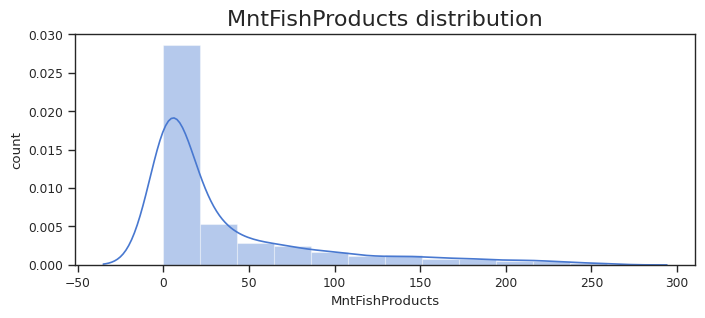

In [436]:
plt.figure(figsize=(8,3))
sns.distplot(df['MntFishProducts'], kde=True, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count')

In [437]:
# isolate X and y variables, and perform train-test split
X = df2.drop(columns='MntFishProducts')
y = df2['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  7.432635666332018e-13
Median value of target variable:  12.0


In [438]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

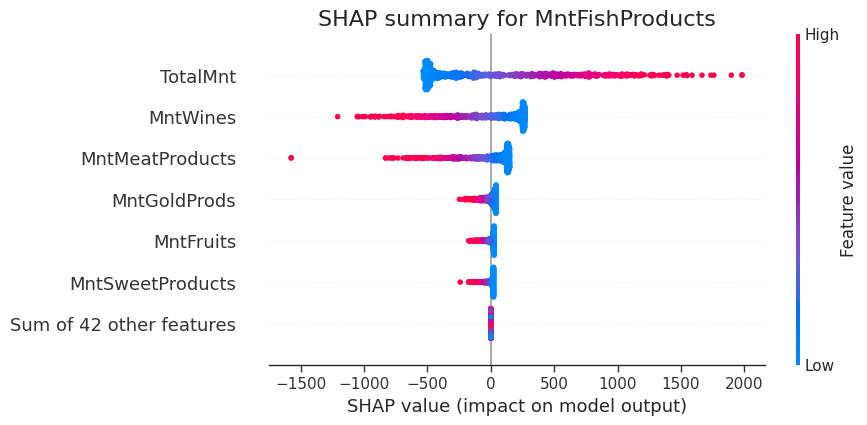

In [441]:
# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7)

In [382]:
# convert country codes to correct nomenclature for choropleth plot
df['Country_code'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# success of campaigns by country code
df_cam = df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': '6'
                                                })

# choropleth plot
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=1000, height = 1000,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

In [383]:
# calculate logistic regression p-values for campaign acceptance ~ country using generalized linear model
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

## get the data of interest for glm
df_cam_wide = df[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

## to store statistics results
stat_results = []

## perform glm
for col in df_cam_wide.drop(columns='Country').columns:
    this_data = df_cam_wide[['Country', col]]
    
    # define formula
    formula = col+'~Country'
    
    # logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
    
    # get chisquare value for overall model (CampaignAccepted ~ Country) and calculate p-value
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7) # Df Model = 7 degrees of freedom when you run result.summary()
     
    # append to stat_results
    stat_results.append(pval)
    
    # print stat summary for entire model
    print(result.summary())
    
## check results
print("\nChisq p-values: ", stat_results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AcceptedCmp1   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2229
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.52
Date:                Sun, 16 Oct 2022   Deviance:                       1065.0
Time:                        14:01:15   Pearson chi2:                 2.23e+03
No. Iterations:                    20   Pseudo R-squ. (CS):           0.001563
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0845      0.387     -7.

/opt/anaconda3/envs/marketing_analysis/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



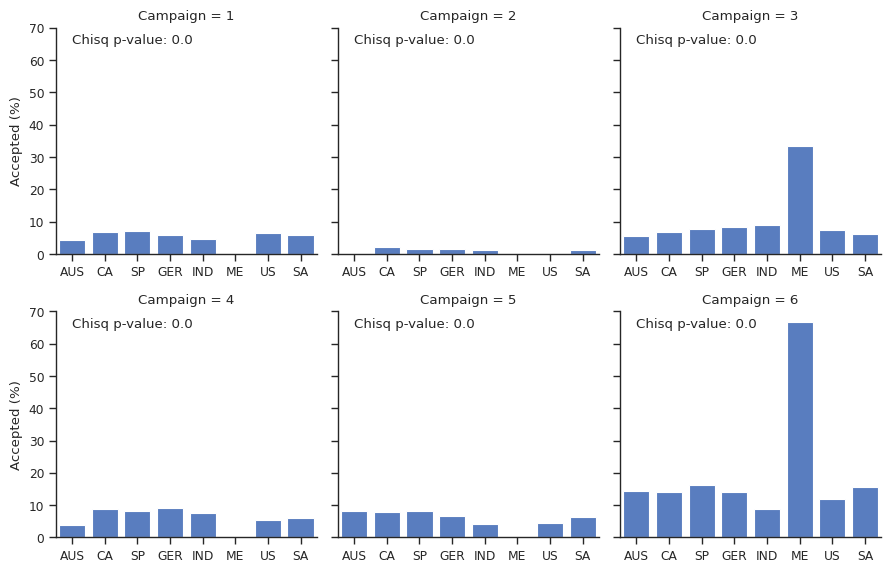

In [399]:
# plotting
## merge in the original country codes provided in the dataset
countries = df[['Country', 'Country_code']].drop_duplicates().reset_index(drop=True)
df_cam2 = df_cam.merge(countries, how='left', on='Country_code')
df_cam2.head()

## bar graphs
g = sns.FacetGrid(df_cam2, col='Campaign', col_wrap=3, sharex = False)
g.map(sns.barplot, 'Country', 'Accepted (%)')
for ax, pval in zip(g.axes.flat, stat_results):
    ax.text(0, 65, "Chisq p-value: "+str(pval)) #add text

g.set_axis_labels('', clear_inner = True)



# Data Visualization

[[Text(0, 0, 'Campaign 2'),
  Text(0, 1, 'Campaign 1'),
  Text(0, 2, 'Campaign 5'),
  Text(0, 3, 'Campaign 3'),
  Text(0, 4, 'Campaign 4'),
  Text(0, 5, 'Campaign 6')]]

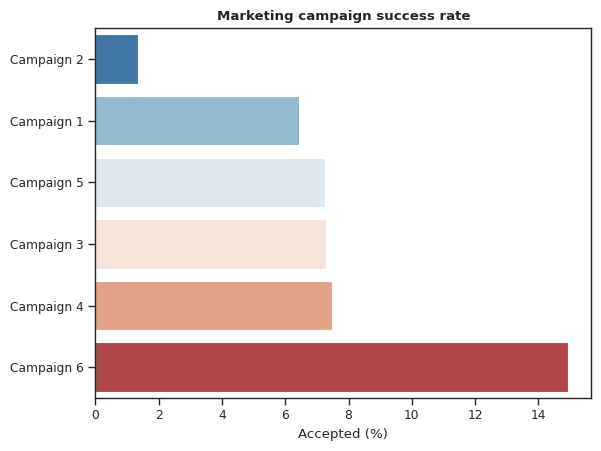

In [542]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
fig = sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='RdBu_r')
plt.xlabel('Accepted (%)')
plt.ylabel('')
plt.title('Marketing campaign success rate', fontweight = 'bold')

fig.set(yticklabels = ['Campaign 2', 'Campaign 1', 'Campaign 5', 'Campaign 3', 'Campaign 4', 'Campaign 6'])


In [386]:
# list of cols with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [387]:
# average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

/tmp/ipykernel_5927/1294671868.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


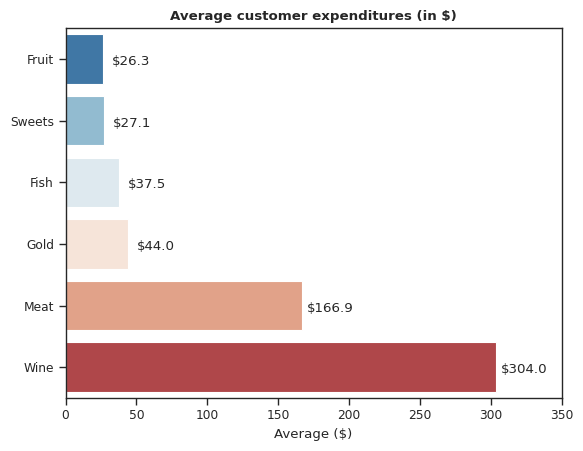

In [541]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='RdBu_r')
plt.ylabel('')
plt.xlabel('Average ($)')
plt.title('Average customer expenditures (in $)', fontweight = 'bold')
ax.set(xlim = (0, 350),
        yticklabels = ['Fruit', 'Sweets', 'Fish', 'Gold', 'Meat', 'Wine']
)


## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+20,
            y=p.get_y()+0.5,
            s='$' + str(q),
            ha="center")

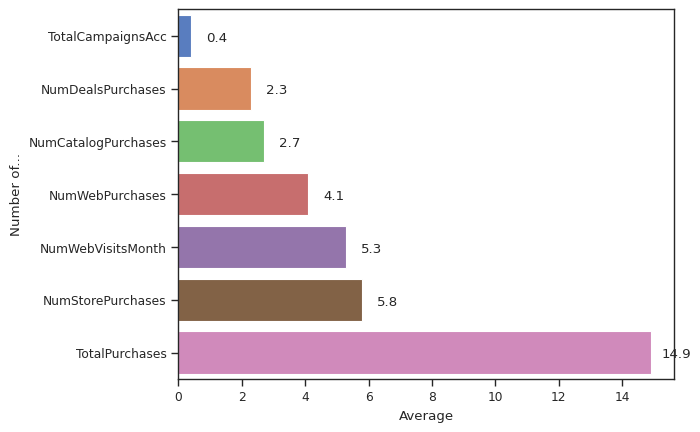

In [389]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='muted')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center")

## Summary

### Overview:
The most recent campaign was the most successful campaign that was run (>14% acceptance rate), with higher values across all regions, but particularly successful in Mexico with an acceptance rate of more than 60%.  
Furthermore, both the campaign acceptance rate and the number of purchases are positively associated with income but negatively associated with an increasing number of dependents.  
The products on which clients spent the most on average in the order of importance are wine and meat, significantly outperforming fruit, sweets, fish, and gold.  
The best performing channels across the different campaigns are web and store purchases, while deals and catalog purchases are underperforming.

### Suggested actions:
* Perform future advertising campaigns using the same model as that what was applied most recently in Mexico.
* Develop two different streams of targeted advertising campaigns, one aimed at high-income individuals and the other aimed at those with children.
* Focus advertising on less successful products to boost their individual sales.
* Focus advertising on more successful channels, such as web and store purchases, to increase the number of people reached.